# Рекомендация тарифов

В вашем распоряжении данные о поведении клиентов, которые уже перешли на эти тарифы (из проекта курса «Статистический анализ данных»). Нужно построить модель для задачи классификации, которая выберет подходящий тариф. Предобработка данных не понадобится — вы её уже сделали.

Постройте модель с максимально большим значением *accuracy*. Чтобы сдать проект успешно, нужно довести долю правильных ответов по крайней мере до 0.75. Проверьте *accuracy* на тестовой выборке самостоятельно.

Задачи классификации - получение категориального ответа на основе набора признаков. Потроим модель которая выберет подходящий тариф на основе набора признаков.

### Структура данных:
*  сalls — количество звонков
*  minutes — суммарная длительность звонков в минутах
*  messages — количество sms-сообщений
*  mb_used — израсходованный интернет-трафик в Мб
*  is_ultra — каким тарифом пользовался в течение месяца («Ультра» — 1, «Смарт» — 0)

### План работы:
1. Изучить файл с данными.
2. Разбить данные на три выборки: обучающая, валидационная и тестовая.
3. Исследовать два модели классификации: Дерево решений и Случайный лес.
4. Найти оптимальные параметры для каждой модели и выбрать одну из них для обучения модели.
5. Оценить точность обученной модели.
6. Оценить адекватность модели.

## Откройте и изучите файл

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import tree
from sklearn.model_selection import GridSearchCV
from sklearn.dummy import DummyClassifier

In [2]:
df = pd.read_csv('/datasets/users_behavior.csv')#запишем датафрейм в переменную
print(df.shape)#выведим количество строк и столбцов
display(df.head())#выведим первые 5 строк

(3214, 5)


,calls,minutes,messages,mb_used,is_ultra
0,40.0,311.90,83.0,19915.42,0
1,85.0,516.75,56.0,22696.96,0
2,77.0,467.66,86.0,21060.45,0
3,106.0,745.53,81.0,8437.39,1
4,66.0,418.74,1.0,14502.75,0


In [3]:
df.info()#изучим тип переменных

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3214 entries, 0 to 3213
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   calls     3214 non-null   float64
 1   minutes   3214 non-null   float64
 2   messages  3214 non-null   float64
 3   mb_used   3214 non-null   float64
 4   is_ultra  3214 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 125.7 KB


In [4]:
unique, counts = np.unique(df.is_ultra, return_counts = True)#посчитаем сколько раз встречается 0 и сколько раз 1
unique, counts

(array([0, 1]), array([2229,  985]))

In [5]:
features = df.drop(['is_ultra'], axis=1)#выделим признаки
target = df['is_ultra']#выделим целевой признак

__Комментарии:___ В датасете пять столбцов, 3214 строк. Количество звонков, суммарная длительность звонков в минутах, количество sms сообщений, израсходованный интернет-трафик в Мб, каким тарифом пользовался в течение месяца ультра-1 или смарт-0. Все зависимые переменные-количественные, целевая переменная-категориальная. Следовательно задача классификации.

## Разбейте данные на выборки

In [6]:
features_train, features_valid, target_train, target_valid = train_test_split(features, target, test_size=0.4, random_state=54321, stratify=target)
#отделяем 40% данных для валидационной выборки
features_train, features_test, target_train, target_test = train_test_split(
   features_train, target_train, test_size=0.2, random_state=54321, stratify=target_train)#отделим 20% для тестовой выборки

In [7]:
print(features_train.shape)
print(target_train.shape)
print(features_valid.shape)
print(target_valid.shape)
print(features_test.shape)
print(target_test.shape)

(1542, 4)
(1542,)
(1286, 4)
(1286,)
(386, 4)
(386,)


## Исследуйте модели

In [8]:
model = DecisionTreeClassifier(random_state=54321)#создадим модель для дерева решений
model.fit(features, target)#обучим модель
predictions_train = model.predict(features)#предскажем модель обучающей выборки
accuracy_score(target, predictions_train)#посчитаем качество модели обучающей выборки
predictions_test = model.predict(features_test)#предскажем модель тестовой выборки
accuracy_score(target_test, predictions_test)#посчитаем качество модели тестовой выборки
print("Accuracy")
print("Обучающая выборка:", accuracy_score(target, predictions_train))
print("Тестовая выборка:", accuracy_score(target_test, predictions_test))

Accuracy
Обучающая выборка: 1.0
Тестовая выборка: 1.0


___Комментарии:___ Результаты не отличаются. Обучающей и тестовой выборке предсказания одинковы.

#### Дерево решений

In [9]:
best_model_df = None
best_result_df = 0
for depth in range(1,7):#переберем значения от 1 до 6
    model = DecisionTreeClassifier(random_state=54321, max_depth = depth)#создадим модель для дерева решений
    model.fit(features_train, target_train)#обучим модель на обучающей выборке
    predictions = model.predict(features)#предскажем модель
    result = accuracy_score(target, predictions)#посчитаем качество модели
    if result > best_result_df:
        best_model_df = model
        best_result_df = result
print("Accuracy лучшей модели:", best_result_df)        

Accuracy лучшей модели: 0.8117610454262602


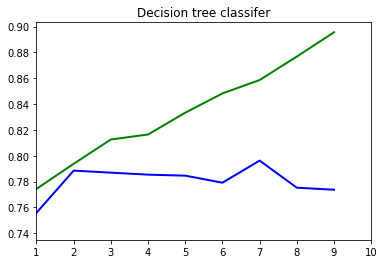

Accuracy лучшей модели: 0.7737169517884914


In [10]:
best_model_df = None
best_result_df = 0
retraining_train = []
retraining_valid = []
for depth in range(1,11):
    model = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    result_v = accuracy_score(target_valid, predictions_valid)
    retraining_train.append(result_v)
    predictions_train = model.predict(features_train)
    result_t = accuracy_score(target_train, predictions_train)
    retraining_valid.append(result_t)
    if result > best_result_df:
        best_model_df = model
        best_result_df = result_v     
plt.plot(retraining_valid, "g", lw=2)
plt.plot(retraining_train, "b", lw=2)
plt.xlim([1, 10])
plt.title("Decision tree classifer")
plt.show()
print("Accuracy лучшей модели:", best_result_df)

#### Смена гиперпараметров

In [12]:
for depth in range(1,6):
    model = DecisionTreeClassifier(random_state=54321, max_depth = depth)
    model.fit(features_train, target_train)
    predictions_valid = model.predict(features_valid)
    print("max_depth=", depth, ":", end='')
    print(accuracy_score(target_valid, predictions_valid))

max_depth= 1 :0.7426127527216174
max_depth= 2 :0.7558320373250389
max_depth= 3 :0.7884914463452566
max_depth= 4 :0.7869362363919129
max_depth= 5 :0.7853810264385692


___Комментарии:___ Наилучшее качество модели получилось при глубине 3. Ответ на вопрос модель получила всего-то за три проверки значений признаков - это очень быстро.

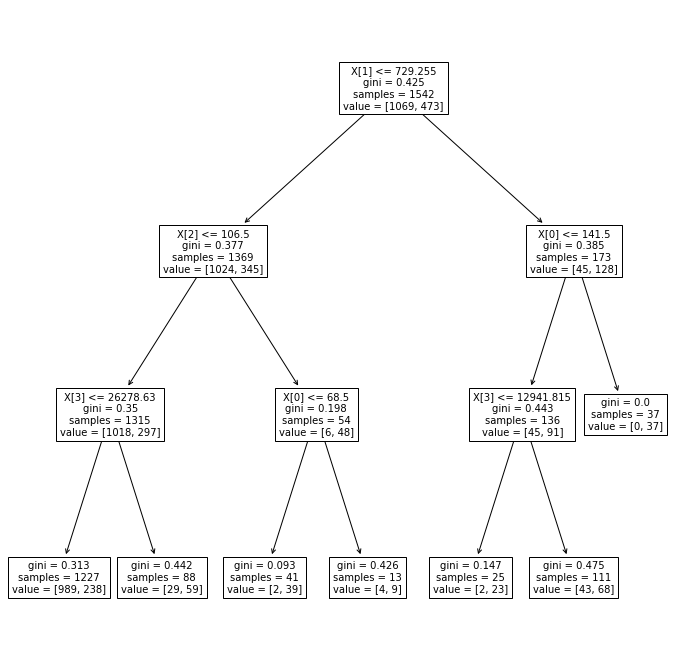

Accuracy лучшей модели: 0.7884914463452566


In [13]:
model = DecisionTreeClassifier(random_state=54321, max_depth = 3)
model.fit(features_train, target_train)
plt.figure(figsize=(12,12))
tree.plot_tree(model, fontsize=10)
plt.show()
predictions = model.predict(features_valid)
result = accuracy_score(target_valid, predictions)

print("Accuracy лучшей модели:", result)

___Комментарии:___ Дерево решений нам показывает как используются гиперпараметры, они уходят влево на третьей глубине.

#### Случайный лес

In [14]:
best_model_rf = None
best_result_rf = 0
for est in range(1, 11):
    model = RandomForestClassifier(random_state=54321, n_estimators=est)#обучим модель с заданным количество деревьев
    model.fit(features_train, target_train)#обучим модель на тренировочной выборке
    result = model.score(features_valid, target_valid)#посчитаем качество модели на валидационной выборке
    if result>best_result_rf:
        best_model_rf = model#сохраним наилучшую модель
        best_result_rf = result#сохраним наилучшее значение метрики accuracy
print("Accuracy наилучшей модели на валидационной выборке:", best_result_rf)

Accuracy наилучшей модели на валидационной выборке: 0.7923794712286159


___Комментарии:___ Мы обучили модель случайного леса с числом деревьев от 1 до 10. Случайный лес медленнее всех: чем больше деревьев, тем неторопливее работает модель. Наилучшая модель accuracy на валидационной выборке 0,79. А качество на тестовой выборке должно получится не меньше 0,8.

In [ ]:
clf = RandomForestClassifier()
parametrs = { 'n_estimators': range (10, 51, 10),
              'max_depth': range (1,13, 2),
              'min_samples_leaf': range (1,8),
              'min_samples_split': range (2,10,2) }
grid = GridSearchCV(clf, parametrs, cv=5)
grid.fit(features_train, target_train)
print(grid.best_params_)

___Комментарии:___ Лучший результат по случайному лесу при глубине дерева 9, минимальное число образцов в листах 7, минимальное число образцов для сплита 8, число деревьев в лесу 10.

## Проверьте модель на тестовой выборке

___Комментарии:___ Так как наилучшие результаты по случайному лесу accuracy 0,79, если учесть, что он медленее работает, мы выбираем модель дерево решений, здесь accuracy 0,82 при глубине 3, проверим ее на тестовой выборке.

In [ ]:
model = DecisionTreeClassifier(random_state=54321, max_depth=3)#создадим модель для дерева решений с гиперпараметром 4
model.fit(features_train, target_train)#обучим модель на обучающей выборке
predictions_test = model.predict(features_test)#предскажем модель
result_test = accuracy_score(target_test, predictions_test)#посчитаем качество модели
print("Accuracy лучшей модели:", result_test)   

___Вывод:___ Чтобы решить задачу классификации, которая выберит подходящий тариф на основе признаков, мы построили модель дерево решений с гиперпараметром четыре и применили ее на тестовой выборки, модель подходит. Accuracy лучшей модели здесь 0,82, то есть 8 правильных ответов из 10. 

In [ ]:
frames_features = [features_train, features_valid]
result_features = pd.concat(frames_features) 
frames_target = [target_train, target_valid] 
result_target = pd.concat(frames_target) 
model = DecisionTreeClassifier(random_state=54321, max_depth=3)#создадим модель для дерева решений с гиперпараметром 4 
model.fit(result_features, result_target)#обучим модель на обучающей выборке 
predictions_test = model.predict(features_test)#предскажем модель 
result_test = accuracy_score(target_test, predictions_test)#посчитаем качество модели 
print("Accuracy лучшей модели:", result_test)

## Проверьте модели на адекватность

In [ ]:
dummy_clf = DummyClassifier(strategy="most_frequent")
dummy_clf.fit(features_test, target_test)
DummyClassifier(strategy='most_frequent')
dummy_clf.predict(features_test)

dummy_clf.score(features_test, target_test)

___Комментарии:___ 69% показывает точность модели.

___Выводы:___ Чтобы построить модель для задачи классификации, которая сделает выбор по подходящему тарифу, мы довели модель с максимально большим значением accuracy. Для этого мы изучили датасет, выяснили сколько строк по двум тарифам и выделили целевой признак и признаки. Разделили датасет на валидационную, обучающую и тестовую выборки, а также стратифицировали данные, чтобы они были равномерными. При исследовании модели нам показала данные что выборка по тестовой и обучающей модели качество одинаковое. Далее мы получили accuracy в дереве решений 0,82, наилучший гиперпарметр показал 0,78 при глубине три. Accuracy случайного леса составила 0,79, хотя лучший результат дерева при глубине 9. На тестовой модели дерево решений показала тоже 0,82 accuracy, значит это самая лучшая модель для решения классификации по выбору тарифа.